In [8]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../')

diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.Series(diabetes.target)
df = pd.concat([data, target], axis=1)
df.columns.values[-1] = 'target'

In [12]:
from tabularmagic.api import TabularMagic
tm = TabularMagic(df)
tm.datahandler().force_binary(['sex'])
tm

WARN: No test dataset provided. Test dataset will be treated as train dataset 
      copy. 
INFO: Initialization complete. Shapes of train, test datasets: (442, 11), (442, 
      11). 
INFO: Forced variable sex to binary. 


TabularMagic 
--------------------------------------------------------------------------------
Train shape: (442, 11)                  Test shape: (442, 11)                   
--------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                
Continuous variables:
  age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target 

In [16]:
from tabularmagic.api.mlC import LinearC


report = tm.ml_classification(
    models=[
        LinearC(),
        LinearC(type='l1'),
    ],
    y_var='sex',
)

INFO: Fitting model LinearC(no_penalty). 
INFO: Fitted model LinearC(no_penalty). 
INFO: Fitting model LinearC(l1). 
INFO: Fitted model LinearC(l1). 


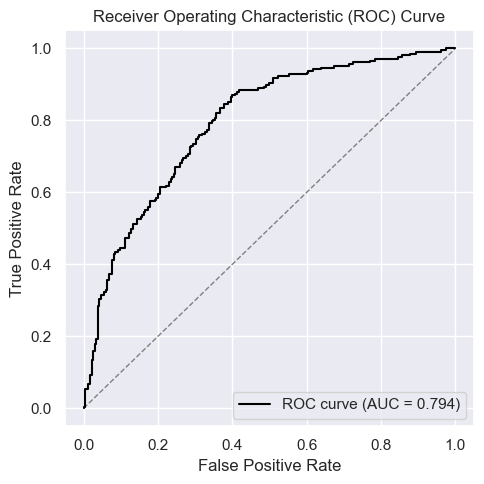

In [17]:
report.model_report('LinearC(l1)').train_report().plot_roc_curve()